In [1]:
import pandas as pd

In [3]:
# Load the dataset
df = pd.read_csv('sales_data_with_discounts.csv')

In [4]:
#Identify Numerical Columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns


In [7]:
#Calculate Basic Statistics
statistics = df[numerical_columns].describe()
statistics['mode'] = df[numerical_columns].mode().iloc[0]
print(statistics)

           Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  mode  
count       450.000000       450.000000   NaN  
mean       3346.499424     30466.336131   NaN  
std        4509.902963     46358.656624   NaN  
min          69.177942       326.974801   NaN  
25%         460.459304      2202.208645   NaN  
50%         988.933733      4677.788059   NaN  
75%   

In [8]:
statistics = df[numerical_columns].describe()
statistics['mean'] = df[numerical_columns].mode().iloc[0]
print(statistics)

           Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  mean  
count       450.000000       450.000000   NaN  
mean       3346.499424     30466.336131   NaN  
std        4509.902963     46358.656624   NaN  
min          69.177942       326.974801   NaN  
25%         460.459304      2202.208645   NaN  
50%         988.933733      4677.788059   NaN  
75%   

In [12]:
#Interpretation of Statistics
#Mean gives the average sales or discounts, providing a central tendency.
#Median helps understand the middle value, indicating the distributions center.
#Mode shows the most common value, revealing trends.
#Standard Deviation indicates the variability in the data, showing consistency or volatility.

In [13]:
#Data Visualization

import matplotlib.pyplot as plt

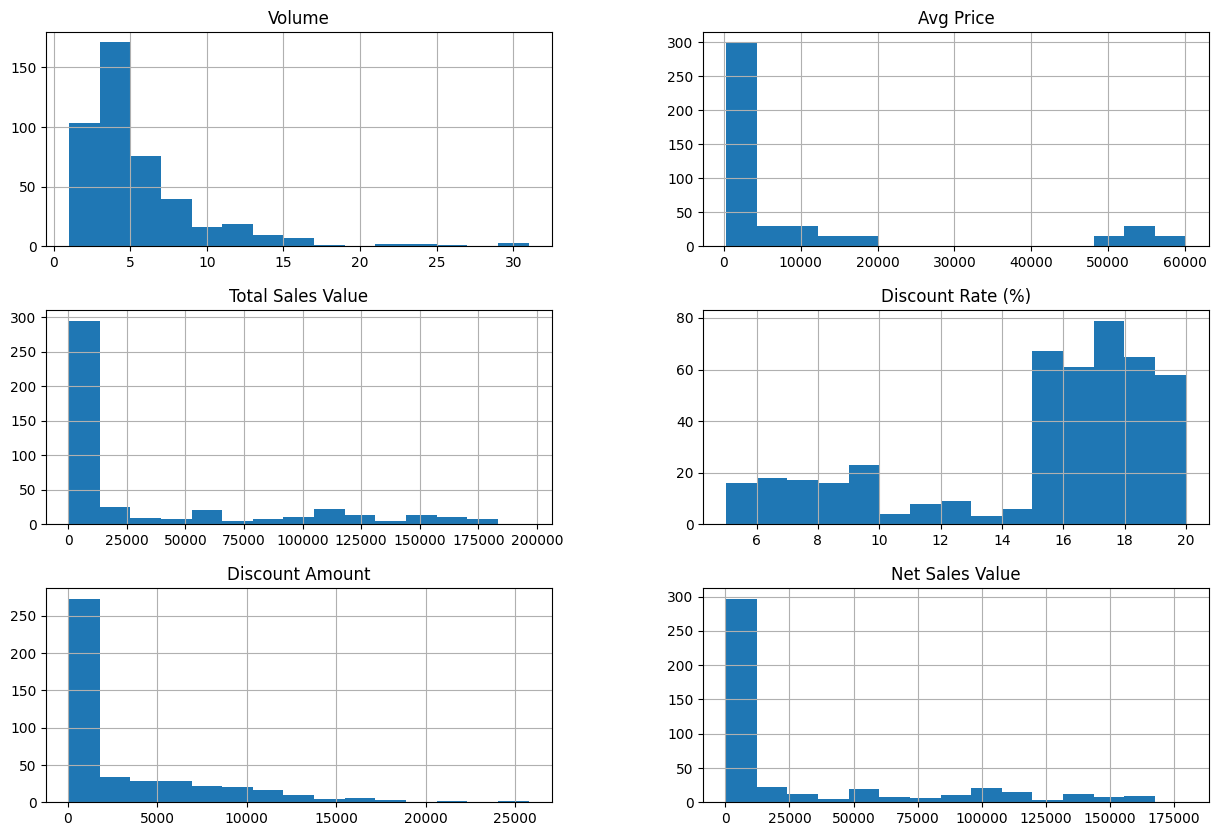

In [16]:
df[numerical_columns].hist(bins=15,figsize=(15,10))
plt.show()

In [18]:
#Skewness indicates asymmetry in data distribution.
#Outliers show extreme values that deviate significantly from other observations.


In [19]:
import seaborn as sns

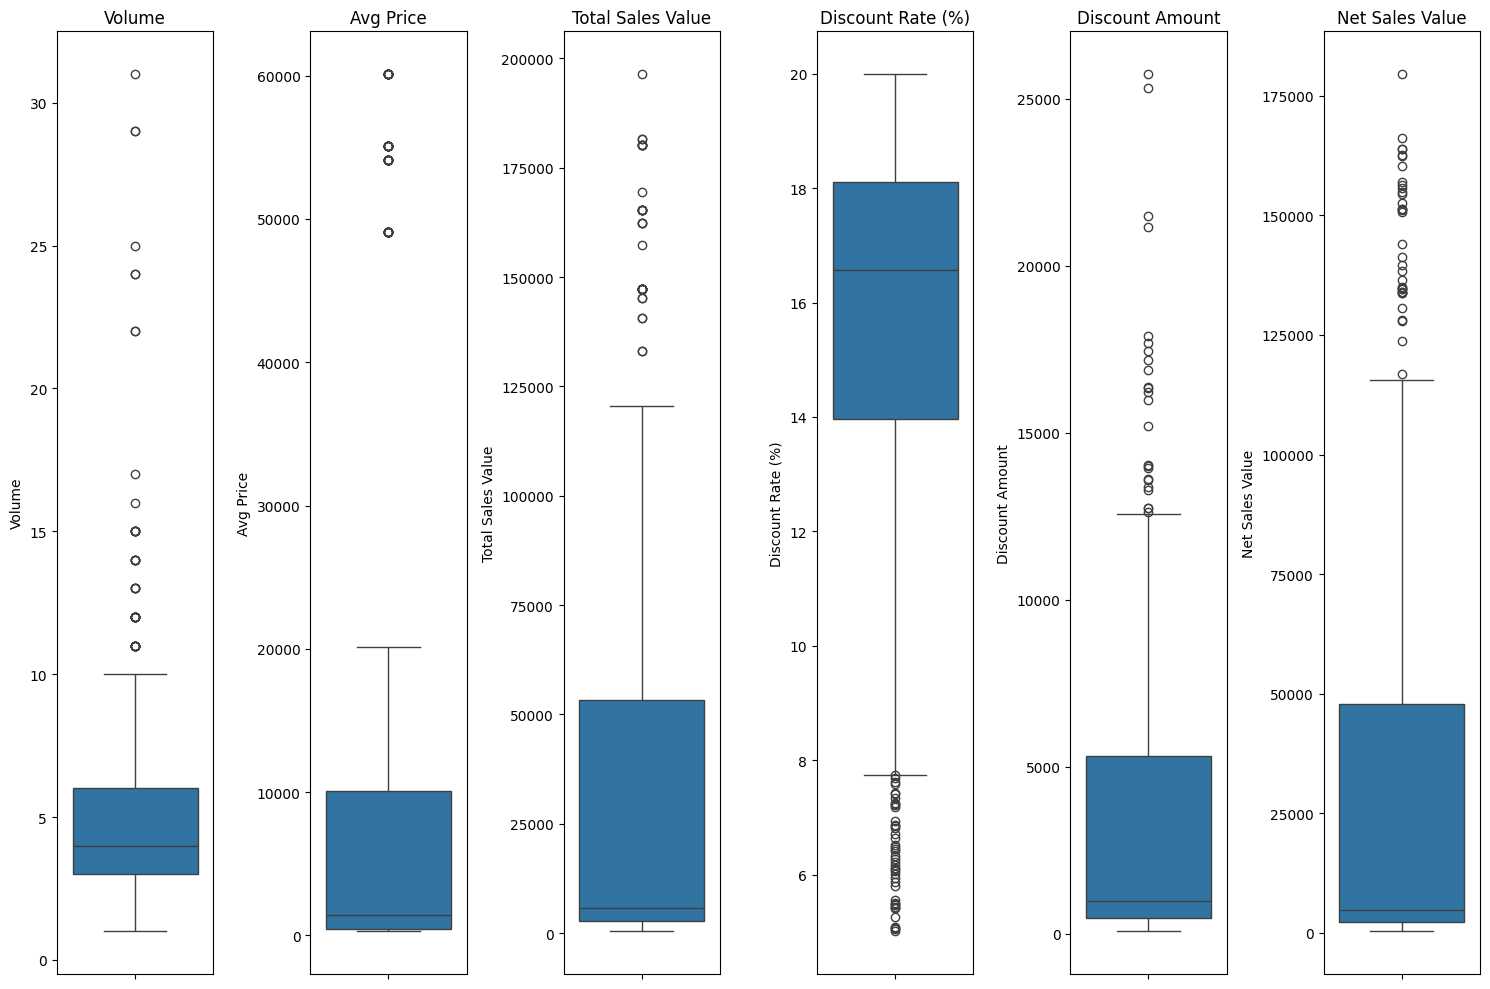

In [23]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i + 1)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()


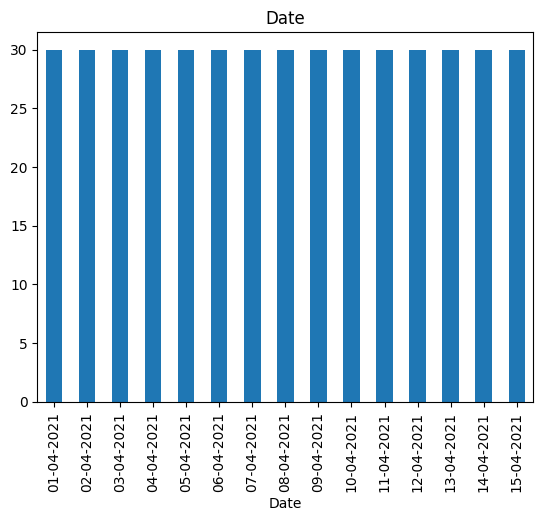

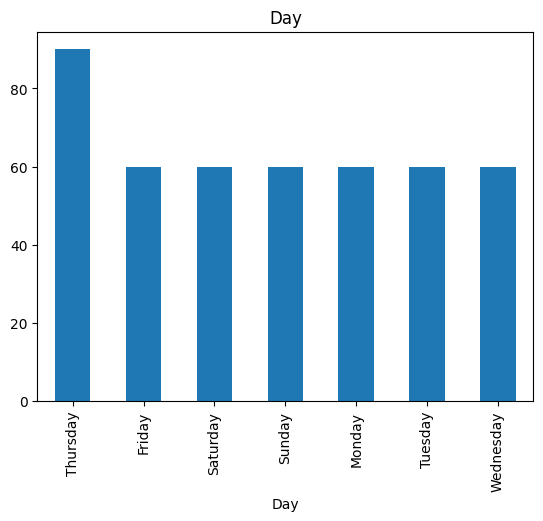

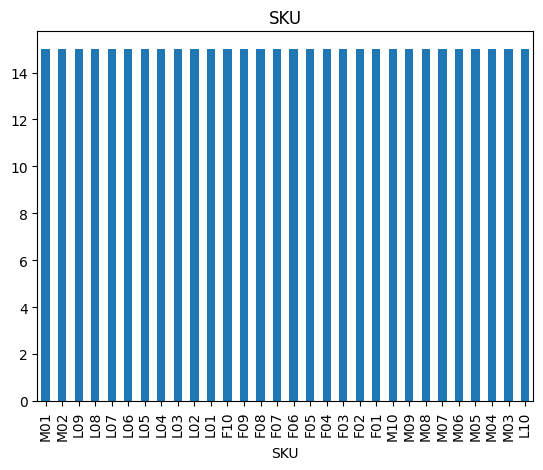

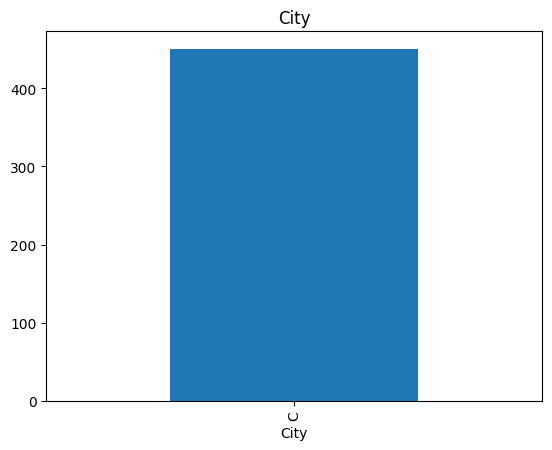

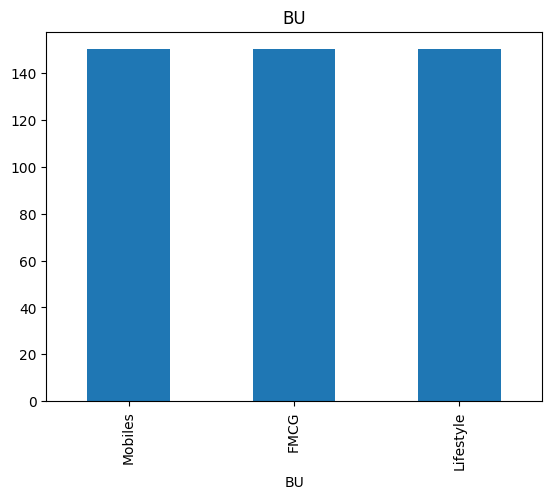

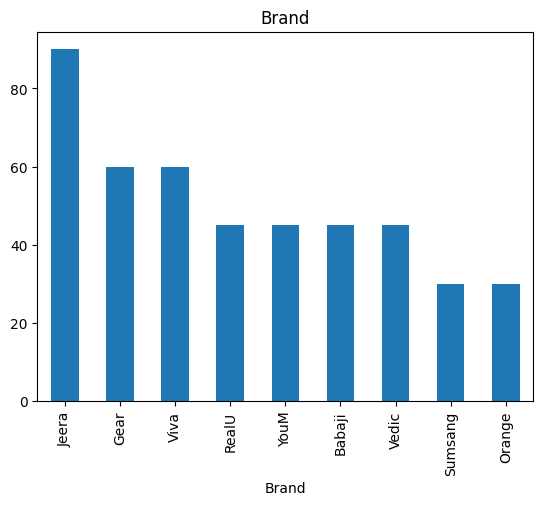

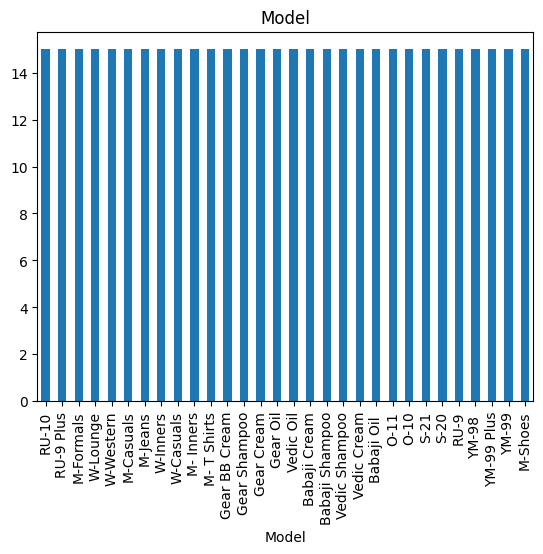

In [24]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.show()


In [25]:
#Explain the Concept of Standardization:
#Standardization (z-score normalization) transforms data to have a mean of 0 and standard deviation of 1, making different scales comparable.

In [26]:
#Standardize Numerical Columns:


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_columns] = scaler.fit_transform(df[numerical_columns])

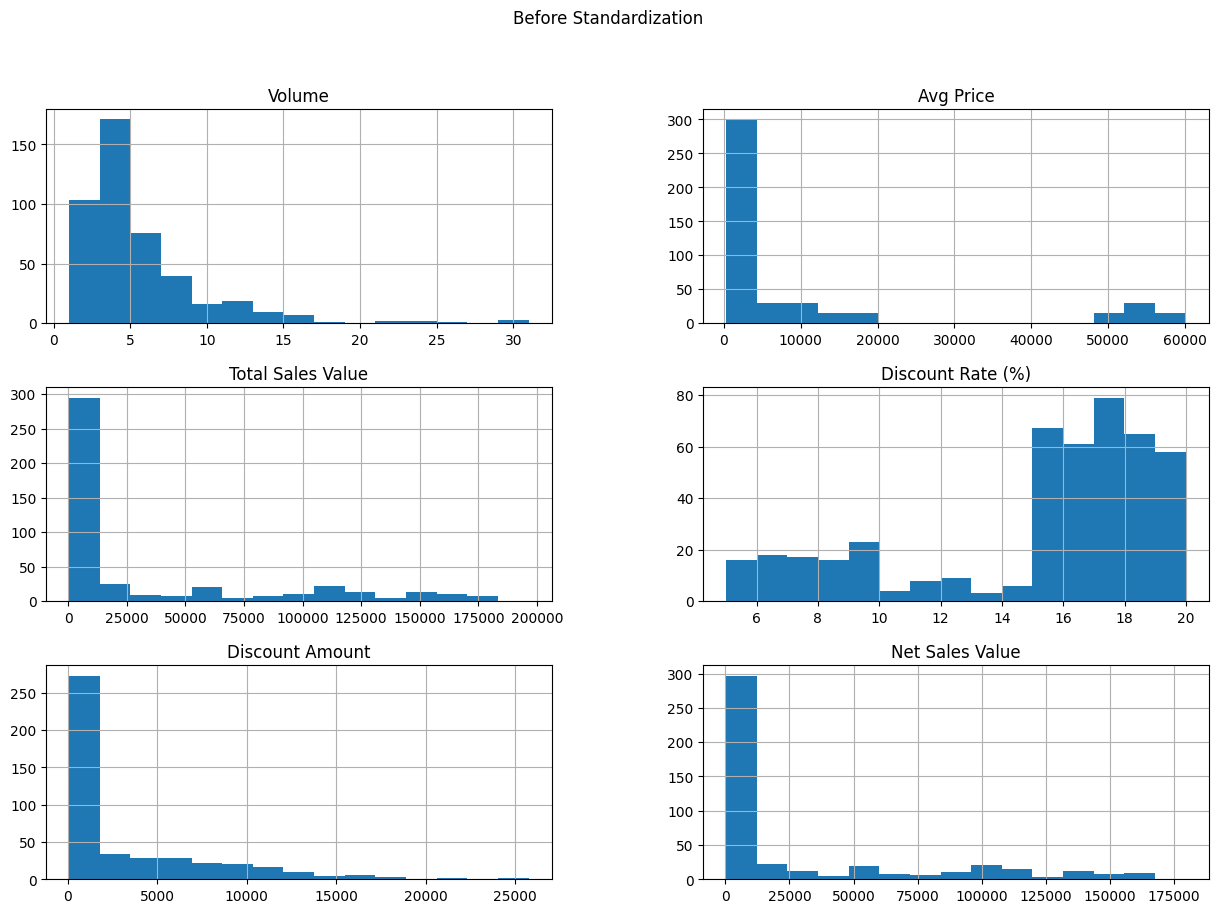

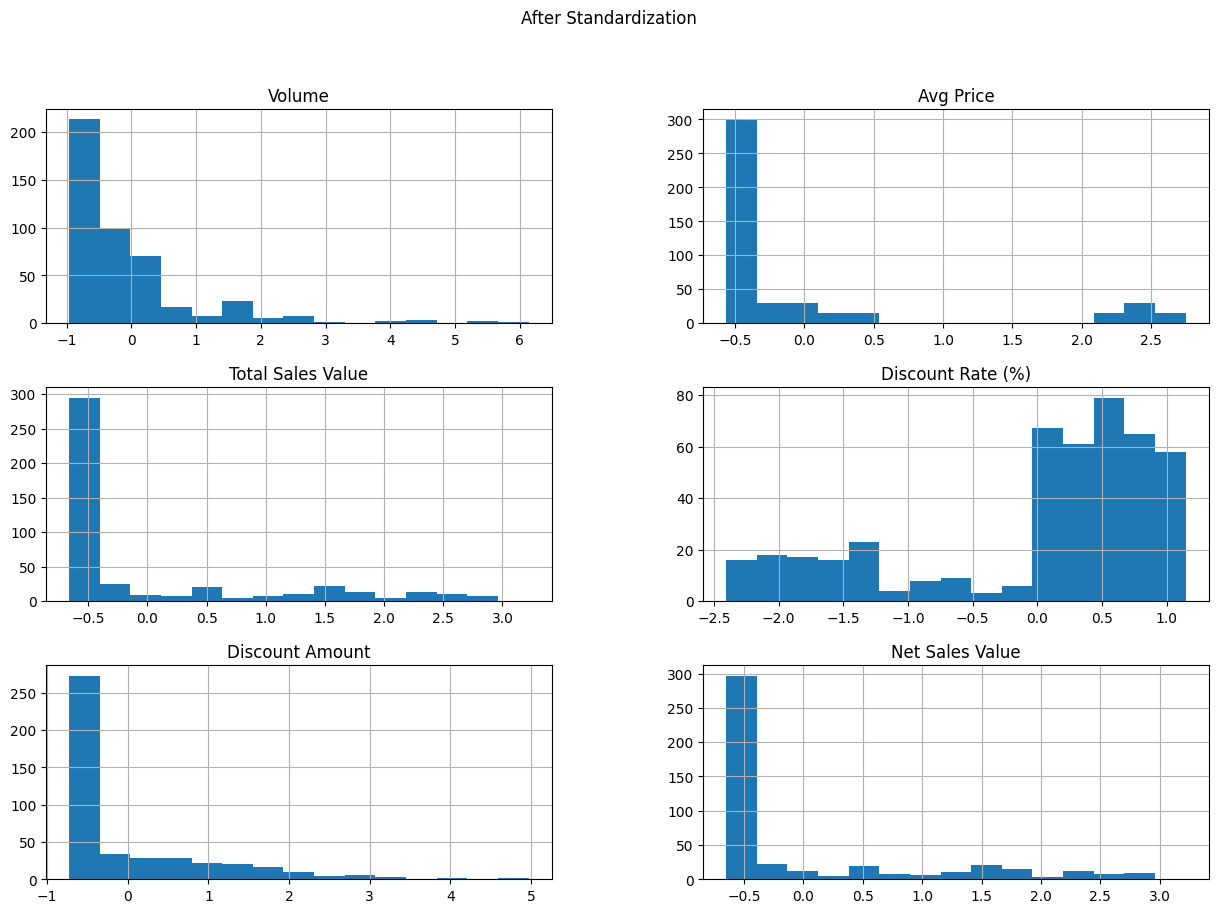

In [27]:
#Show Before and After Comparisons of Data Distributions:


df[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('Before Standardization')
plt.show()

df_standardized[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('After Standardization')
plt.show()


In [28]:
#Conversion of Categorical Data into Dummy Variables

#Discuss the Need for Converting Categorical Data into Dummy Variables:

#Machine learning algorithms require numerical input. One-hot encoding converts categorical data into binary columns, making them machine-readable.


In [30]:
#Apply One-Hot Encoding to the Categorical Columns

df_encoded = pd.get_dummies(df, columns=categorical_columns)
print(df_encoded.head())


   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0    160346.501180             True            False            False   
1     89323.897039             True            False            False   
2    102042.089843             True            False            False   
3    112235.925298             True            False            False   
4     19927.053770             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...